In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


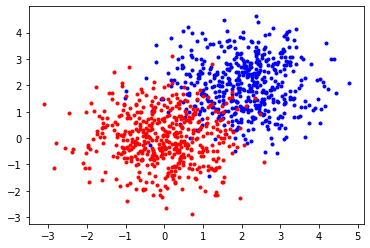

In [2]:
M=1000 #number of samples
m=int(M/2) #number of red and blue dots
posB,posR=range(m),range(m,M) #the position of the blue and red dots

#Samples
X,Y=zeros((M,2)),zeros(M)
X[posB,:],Y[posB]=randn(m,2)+[2,2],-1 #the blue dots are shifted
X[posR,:],Y[posR]=randn(m,2),
plot(X[posB,0],X[posB,1],'.b')
plot(X[posR,0],X[posR,1],'.r')

In [3]:
def ftilde(W,x):
    return dot(x,W[0:2])+W[2]

In [4]:
def E(W):
    return 1/M*sum(log(1+exp(-Y*ftilde(W,X))))

In [5]:
##Checking, this code must not make any errors
W=array([0,0,0])
assert abs(E(W)-log(2))<1e-8,'Problem in the E function'

In [6]:
def dE(W): ##Gradient calculation
    tildeY=ftilde(W,X)
    Z=-Y*exp(-tildeY*Y)/(1+exp(-tildeY*Y))
    return array([sum(Z*X[:,0]),sum(Z*X[:,1]),sum(Z)])/M

In [7]:
##Checking, this code must not make any errors
W=array([0,0,0])
assert norm(dE(W)-array([-sum(Y*X[:,0])/(2*M),-sum(Y*X[:,1])/(2*M),-sum(Y)/M]))<1e-8,"Error"

In [134]:
#Function that calculates Wn+1
def W(Wn,Sn,Yn): 
        d = Wn.shape[0] 
        Id = np.eye(d) 
        Sn_Yn_t = np.outer(Sn, Yn) 
        Yn_Sn_t = np.outer(Yn , Sn) 
        Sn_Yn = np.dot(Sn,Yn) 
        Sn_Sn_t = np.outer(Sn , Sn) 
        Wnplus1 =  np.dot(np.dot((Id - (Sn_Yn_t/Sn_Yn)), Wn), (Id - (Yn_Sn_t / Sn_Yn))) + Sn_Sn_t / Sn_Yn 
        return Wnplus1

In [135]:
import numpy.linalg as ln

def bfgs(df,x0,tau=0.5,tol=1e-3,Niter=1000):
    n = 0 
    L=[]
    grad_n=df(x0) 
    N = len(x0) 
    Wn= np.eye(N, dtype=int) 
    xn = x0 
    L.append (xn) 
    while ln.norm(grad_n) > tol and n < Niter: 
        hn=- np.dot(Wn , grad_n) 
        xnplus1 = xn +hn 
        sn = xnplus1 - xn  
        grad_nplus1 = df(xnplus1) 
        yn = grad_nplus1 - grad_n 
        grad_n= grad_nplus1 
        Wn=W(Wn,sn,yn) 
        xn=xnplus1 
        L.append(xn) 
        n +=1   
    print("Problem, the bfgs method did not converge after",Niter, "iterations")
    return xn, L 

In [128]:
#Testing of the BFGS function
L=[]
W0=array([0,0,1])
Wstar,L = bfgs(dE, W0)
print('The result of bfgs:')
print(L)

Le resultat de bfgs:
[array([0, 0, 1]), array([-0.75773965, -0.73473915,  0.76894142]), array([-0.804451  , -0.76832619,  0.87524342]), array([-1.30655414, -1.12886094,  2.08500868]), array([-1.58935034, -1.33789563,  2.77102857]), array([-1.89615407, -1.57316594,  3.49372525]), array([-2.11028995, -1.74570923,  3.97562456]), array([-2.24321853, -1.8605292 ,  4.2568316 ]), array([-2.30944568, -1.92547469,  4.38271913]), array([-2.34672742, -1.97240061,  4.43906148]), array([-2.35085833, -1.99461182,  4.42688193]), array([-2.33304519, -1.99292834,  4.38359704]), array([-2.31526231, -1.98696942,  4.3520082 ]), array([-2.29503614, -1.9833359 ,  4.32625   ]), array([-2.27520701, -1.98830598,  4.31621743]), array([-2.26955252, -2.00358493,  4.33548301])]


In [136]:
#Affichage du minimum
print('final result (the best point is ): %s' % (resultat))
print('The number of iterations : %s' % (k))

resultat final (le meilleur point est ): [-2.26955252 -2.00358493  4.33548301]
nbre de iterations est : 15


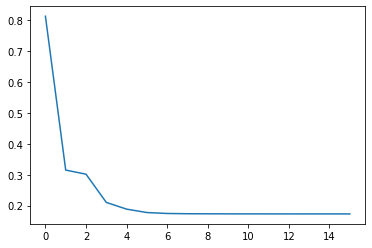

In [137]:
#Display of the minimum search curve
plot([E(w) for w in L])

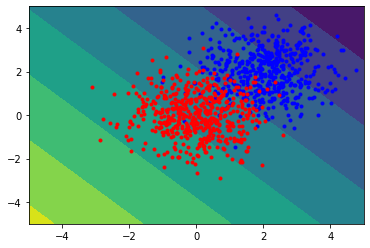

In [130]:
xx1=linspace(-5,5,100)
xx2=linspace(-5,5,100)
Z=[[ftilde(Wstar,array([x1,x2])) for x1 in xx1] for x2 in xx2]

#affichage
contourf(xx1,xx2,Z)
plot(X[posB,0],X[posB,1],'.b')
plot(X[posR,0],X[posR,1],'.r')

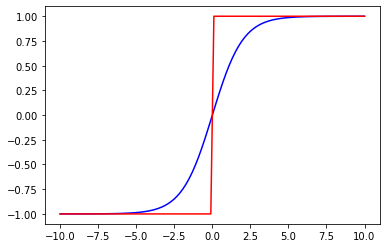

In [131]:
tt=linspace(-10,10,100)
def theta(t):return (1-exp(-t))/(1+exp(-t))
plot(tt,theta(tt),'b')
plot(tt,sign(tt),'r')

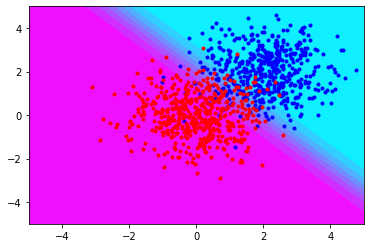

In [132]:
#affichage 
contourf(xx1,xx2,theta(array(Z)),cmap='cool')
plot(X[posB,0],X[posB,1],'.b')
plot(X[posR,0],X[posR,1],'.r')